In [1]:
import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os,sys
from tqdm import tqdm
import datetime
import proplot as plot
from netCDF4 import Dataset
from wrf import getvar

sys.path.insert(1, '/work/08350/tg876493/stampede2/python_codes/2020_TC_CRF/dev/freddy0218/tools/')
import derive_var
%matplotlib inline

plot.rc.update({'figure.facecolor':'w','axes.labelweight':'ultralight',
                'tick.labelweight':'ultralight','gridminor.linestyle':'--','title.weight':'normal','linewidth':0.5})

In [2]:
!ls /scratch/06040/tg853394/tc/output/redux/maria/ctl

azim_AVOR_0-144hr.nc		wrfout_d01_2017-09-17_01:00:00
azim_HFX_0-144hr.nc		wrfout_d01_2017-09-17_02:00:00
azim_H_DIABATIC_0-144hr.nc	wrfout_d01_2017-09-17_03:00:00
azim_LH_0-144hr.nc		wrfout_d01_2017-09-17_04:00:00
azim_OLRC_0-144hr.nc		wrfout_d01_2017-09-17_05:00:00
azim_OLR_0-144hr.nc		wrfout_d01_2017-09-17_06:00:00
azim_PW_0-144hr.nc		wrfout_d01_2017-09-17_07:00:00
azim_QCLOUD_0-144hr.nc		wrfout_d01_2017-09-17_08:00:00
azim_QICE_0-144hr.nc		wrfout_d01_2017-09-17_09:00:00
azim_QVAPOR_0-144hr.nc		wrfout_d01_2017-09-17_10:00:00
azim_RTHRATLWC_0-144hr.nc	wrfout_d01_2017-09-17_11:00:00
azim_RTHRATLW_0-144hr.nc	wrfout_d01_2017-09-17_12:00:00
azim_RTHRATSWC_0-144hr.nc	wrfout_d01_2017-09-17_13:00:00
azim_RTHRATSW_0-144hr.nc	wrfout_d01_2017-09-17_14:00:00
azim_SLP_0-120hr.nc		wrfout_d01_2017-09-17_15:00:00
azim_SLP_0-144hr.nc		wrfout_d01_2017-09-17_16:00:00
azim_T_0-144hr.nc		wrfout_d01_2017-09-17_17:00:00
azim_U10_0-144hr.nc		wrfout_d01_2017-09-17_18:00:00
azim_U_0-144hr.nc		wrfout_d01_2017-

In [3]:
origin_path = '/scratch/06040/tg853394/tc/output/redux/maria/'
#Function####################################################
def read_some_azimuth_fields(fileloc=None,fieldname=None):
    dict_name = {}
    for inx,obj in enumerate(fileloc):
        field_read = xr.open_dataset(obj)
        dict_name[fieldname[inx]] = field_read
    return dict_name

expname = ['ctl','ncrf_36h','ncrf_60h','lwcrf']
timestart = ['0','36','60','0']
doexp=1
#############################################################
ctrlvar_dict = read_some_azimuth_fields(fileloc=[origin_path+expname[doexp]+'/azim_U_'+timestart[doexp]+'-144hr.nc',
                                                origin_path+expname[doexp]+'/azim_U10_'+timestart[doexp]+'-144hr.nc',
                                                 origin_path+expname[doexp]+'/azim_V_'+timestart[doexp]+'-144hr.nc',
                                                origin_path+expname[doexp]+'/azim_V10_'+timestart[doexp]+'-144hr.nc',
                                                origin_path+expname[doexp]+'/azim_T_'+timestart[doexp]+'-144hr.nc',
                                                origin_path+expname[doexp]+'/azim_RTHRATSW_'+timestart[doexp]+'-144hr.nc',
                                                origin_path+expname[doexp]+'/azim_RTHRATLW_'+timestart[doexp]+'-144hr.nc',
                                                origin_path+expname[doexp]+'/azim_H_DIABATIC_'+timestart[doexp]+'-144hr.nc',
                                                origin_path+expname[doexp]+'/azim_RTHRATSWC_'+timestart[doexp]+'-144hr.nc',
                                                origin_path+expname[doexp]+'/azim_RTHRATLWC_'+timestart[doexp]+'-144hr.nc'],
                                        fieldname=['U','U10','V','V10','T','RTHRATSW','RTHRATLW','H_DIABATIC',
                                                  'RTHRATSWC','RTHRATLWC'])

#### FUNCTIONS

In [2]:
def nearest_index(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx.values

import json,pickle
def save_to_pickle(loc=None,var=None):
    with open(loc,"wb") as f:
        pickle.dump(var,f)
    return None
from scipy.ndimage import gaussian_filter

### Read in variables

In [3]:
path = '/work2/08350/tg876493/stampede2/python_codes/tcg_radiation/output/'
file = [path+'ctrl_thetaall',path+'ncrf36_thetaall',path+'ncrf60_thetaall']

output = []
for i in range(len(file)):
    with open(file[i],'rb') as f:
        output.append(pickle.load(f))
theta_dict = {'CTRL_theta':output[0],'NCRF36_theta':output[1],'NCRF60_theta':output[2]}
#########################################################################################################
# To be consistent with azimuthal files
########################################################################################################
ctrl_thetaA = np.swapaxes(np.asarray(theta_dict['CTRL_theta']),0,1)
ncrf36_thetaA = np.swapaxes(np.asarray(theta_dict['NCRF36_theta']),0,1)
#########################################################################################################
# Radius cut offs
#########################################################################################################
r0,r200=(nearest_index(ctrlvar_dict['T']['T'].radius,0),nearest_index(ctrlvar_dict['T']['T'].radius,200))
r300,r500=(nearest_index(ctrlvar_dict['T']['T'].radius,300),nearest_index(ctrlvar_dict['T']['T'].radius,500))
###################################################################
# Heating Rate
###################################################################
ctrl_thetagrad_b = derive_var.backward_secondorder(ctrl_thetaA,60*60,0)
ncrf36_thetagrad_b = derive_var.backward_secondorder(ncrf36_thetaA,60*60,0)
#ctrl_thetagrad_c = np.gradient(ctrl_thetaA,60*60,axis=0)

NameError: name 'ctrlvar_dict' is not defined

##### Smooth?

In [7]:
ctrl_thetagrad_b_s = derive_var.do_gauss_smooth(var=ctrl_thetagrad_b,gaussian=[3,0,0])
ncrf36_thetagrad_b_s = derive_var.do_gauss_smooth(var=ncrf36_thetagrad_b,gaussian=[3,0,0])
#ctrl_thetagrad_c_s = do_gauss_smooth(var=ctrl_thetagrad_c,gaussian=[3,0,0])

############################################################################
# All radiative heating
############################################################################
#lwheat,swheat = ctrlvar_dict['RTHRATLW']['RTHRATLW'].copy(),ctrlvar_dict['RTHRATSW']['RTHRATSW'].copy()
#allradheat_s = derive_var.do_gauss_smooth(var=lwheat+swheat,gaussian=[3,0,0])
#lwheat_s = derive_var.do_gauss_smooth(var=lwheat,gaussian=[3,0,0])
#swheat_s = derive_var.do_gauss_smooth(var=swheat,gaussian=[3,0,0])

############################################################################
# Clear air radiative heating
############################################################################
#lwcheat_s = derive_var.do_gauss_smooth(var=ctrlvar_dict['RTHRATLWC']['RTHRATLWC'].copy(),gaussian=[3,0,0])
#swcheat_s = derive_var.do_gauss_smooth(var=ctrlvar_dict['RTHRATSWC']['RTHRATSWC'].copy(),gaussian=[3,0,0])

############################################################################
# Microphysical Heating
############################################################################
#hdia_s = derive_var.do_gauss_smooth(var=ctrlvar_dict['H_DIABATIC']['H_DIABATIC'],gaussian=[3,0,0])

Finished!
Finished!


In [4]:
origin_path = '/scratch/06040/tg853394/tc/output/redux/maria/'
#Function####################################################
def read_some_azimuth_fields(fileloc=None,fieldname=None):
    dict_name = {}
    for inx,obj in enumerate(fileloc):
        field_read = xr.open_dataset(obj)
        dict_name[fieldname[inx]] = field_read
    return dict_name

expname = ['ctl','ncrf_36h','ncrf_60h','lwcrf']
timestart = ['0','36','60','0']
doexp=0
#############################################################
ctrlvar_dict = read_some_azimuth_fields(fileloc=[origin_path+expname[doexp]+'/azim_U_'+timestart[doexp]+'-144hr.nc'],fieldname=['U'])
#########################################################################################################
# Radius cut offs
#########################################################################################################
r0,r200=(nearest_index(ctrlvar_dict['U']['U'].radius,0),nearest_index(ctrlvar_dict['U']['U'].radius,200))
r300,r500=(nearest_index(ctrlvar_dict['U']['U'].radius,300),nearest_index(ctrlvar_dict['U']['U'].radius,500))

from metpy.calc import pressure_to_height_std
from metpy.units import units
####################################################################################
# Analysis Period
####################################################################################
ctrl_t2,ctrl_t4 = nearest_index(ctrlvar_dict['U']['U'].time/24,1)-1,\
nearest_index(ctrlvar_dict['U']['U'].time/24,4.5)-1
####################################################################################
# Vertical coordinates
####################################################################################
path_coor = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/post/U.nc'
coor = xr.open_dataset(path_coor)

In [5]:
path = '/work2/08350/tg876493/stampede2/python_codes/2020_TC_CRF/dev/freddy0218/pca/output/gauss_smooth/'
file = [path+'ctl/allradheat2',path+'ncrf36/allradheat2',\
       path+'ctl/thetagrad_b',path+'ncrf36/thetagrad_b',\
       path+'ctl/hdia',path+'ncrf36/hdia',\
       path+'ctl/swcheat',path+'ncrf36/swcheat']

output = []
for i in range(len(file)):
    with open(file[i],'rb') as f:
        output.append(pickle.load(f))
var_dict = {'CTRL_allradheat':output[0],'NCRF36_allradheat':output[1],
            'CTRL_thetagrad':output[2],'NCRF36_thetagrad':output[3],
            'CTRL_hdia':output[4],'NCRF36_hdia':output[5]}
#           'CTRL_swcheat':output[6],'NCRF36_swcheat':output[7]}
del output

In [9]:
def add_ctrl_before_senstart(CTRLvar=None,SENvar=None,exp='NCRF36',firstdo='Yes'):
    if firstdo=='Yes':
        if exp=='NCRF36':
            return np.concatenate((CTRLvar[0:36],SENvar))
        elif exp=='NCRF60':
            return np.concatenate((CTRLvar[0:60],SENvar))
    else:
        return SENvar
NCRF36_thetagrad = add_ctrl_before_senstart(var_dict['CTRL_thetagrad'],var_dict['NCRF36_thetagrad'],'NCRF36','Yes')
#NCRF36_lwheat = add_ctrl_before_senstart(var_dict['CTRL_lwheat'],var_dict['NCRF36_lwheat'],'NCRF36','No')
#NCRF36_lwcheat = add_ctrl_before_senstart(var_dict['CTRL_lwcheat'],var_dict['NCRF36_lwcheat'],'NCRF36','No')
#NCRF36_swheat = add_ctrl_before_senstart(var_dict['CTRL_swheat'],var_dict['NCRF36_swheat'],'NCRF36','No')
#NCRF36_swcheat = add_ctrl_before_senstart(var_dict['CTRL_swcheat'],var_dict['NCRF36_swcheat'],'NCRF36','No')

#CTRL_allrad = var_dict['CTRL_lwheat']+var_dict['CTRL_swheat']
#NCRF36_allrad = NCRF36_lwheat+NCRF36_swheat

In [11]:
residual_ctrl = var_dict['CTRL_thetagrad']-var_dict['CTRL_allradheat'][1:,:]-var_dict['CTRL_hdia'][1:,:]
residual_ncrf36 = NCRF36_thetagrad-var_dict['NCRF36_allradheat'][1:,:]-var_dict['NCRF36_hdia'][1:,:]
#residual_ncrf60 = NCRF60_thetagrad-NCRF60_allradheat[1:,:]-NCRF60_hdia[1:,:]

In [12]:
import json,pickle
def save_to_pickle(loc=None,var=None):
    with open(loc,"wb") as f:
        pickle.dump(var,f)
    return None

save_to_pickle(loc='./output/gauss_smooth/ctl/residual',var=residual_ctrl)
#save_to_pickle(loc='./output/gauss_smooth/ncrf36/lwheat',var=NCRF36_lwheat)
#save_to_pickle(loc='./output/gauss_smooth/ncrf36/lwcheat',var=NCRF36_lwcheat)
#save_to_pickle(loc='./output/gauss_smooth/ncrf36/swheat',var=NCRF36_swheat)
#save_to_pickle(loc='./output/gauss_smooth/ncrf36/swcheat',var=NCRF36_swcheat)
save_to_pickle(loc='./output/gauss_smooth/ncrf36/residual',var=residual_ncrf36)
save_to_pickle(loc='./output/gauss_smooth/ncrf36/thetagrad_b',var=NCRF36_thetagrad)
#save_to_pickle(loc='./output/gauss_smooth/ncrf36/allradheat2',var=NCRF36_allrad)
#save_to_pickle(loc='./output/gauss_smooth/ncrf60/allradheat',var=NCRF60_allradheat)
#save_to_pickle(loc='./output/gauss_smooth/ncrf60/hdia',var=NCRF60_hdia)
#save_to_pickle(loc='./output/gauss_smooth/ncrf60/thetagrad_b',var=NCRF60_thetagrad)
#save_to_pickle(loc='./output/gauss_smooth/ncrf60/residual',var=residual_ncrf60)
#ave_to_pickle(loc='../output/ncrf60_thetaall',var=ncrf60_theta)

### Long duration vertical profiles

#### Night/Day

In [13]:
import datetime,pytz
def divide_nightday(array=None,timedivider=None,startindex=23):
    night,day,alll = [],[],[]
    for i in range(len(timedivider[startindex:])):
        temp = array[startindex:,:,:,:r500]
        nightday = timedivider[startindex:]
        if nightday[i]==False:
            day.append(temp[i,:,:,:r500])
            alll.append(temp[i,:,:,:r500])
        else:
            night.append(temp[i,:,:,:r500])
            alll.append(temp[i,:,:,:r500])
    del i
    return np.asarray(day),np.asarray(night),np.asarray(alll)

start = datetime.datetime(2017,9,14,12,0,0)
start_residual = datetime.datetime(2017,9,14,13,0,0)
timeaxis,timeaxis_residual=[start+datetime.timedelta(hours = -4)],[start_residual+datetime.timedelta(hours = -4)] #UTC-4
for i in range(144):
    timeaxis.append(timeaxis[-1]+datetime.timedelta(hours=1))
    timeaxis_residual.append(timeaxis_residual[-1]+datetime.timedelta(hours=1))

timeaxis_night = [timeaxisobj.hour<6 or timeaxisobj.hour>18 for timeaxisobj in timeaxis]
timeaxis_night_residual = [timeaxisobj.hour<6 or timeaxisobj.hour>18 for timeaxisobj in timeaxis_residual]

In [14]:
############################################################################################
# Nighttime/Daytime Partition 170915/08-
############################################################################################
timeaxis_night = [timeaxisobj.hour<6 or timeaxisobj.hour>18 for timeaxisobj in timeaxis]
timeaxis_night_residual = [timeaxisobj.hour<6 or timeaxisobj.hour>18 for timeaxisobj in timeaxis_residual]
############################################################################################
# Divide variables
############################################################################################
# Radiative
allradheat_s_d,allradheat_s_n,allradheat_s_all = divide_nightday(var_dict['CTRL_allradheat'],timeaxis_night,36)
ncrf36allradheat_s_d,ncrf36allradheat_s_n,ncrf36allradheat_s_all = divide_nightday(var_dict['NCRF36_allradheat'],timeaxis_night,36)
# Latent
hdia_s_d,hdia_s_n,hdia_s_all = divide_nightday(var_dict['CTRL_hdia'],timeaxis_night,24)
ncrf36hdia_s_d,ncrf36hdia_s_n,ncrf36hdia_s_all = divide_nightday(var_dict['NCRF36_hdia'],timeaxis_night,24)
# Residual
residual_d,residual_n,residual_all = divide_nightday(residual_ctrl,timeaxis_night_residual[:-1],23)
ncrf36residual_d,ncrf36residual_n,ncrf36residual_all = divide_nightday(residual_ncrf36,timeaxis_night_residual[:-1],23)
# Net
netheat_s_d,netheat_s_n,netheat_s_all = divide_nightday(var_dict['CTRL_thetagrad'],timeaxis_night_residual[:-1],23)
ncrf36netheat_s_d,ncrf36netheat_s_n,ncrf36netheat_s_all = divide_nightday(NCRF36_thetagrad,timeaxis_night_residual[:-1],23)

#lwheat_s_d,lwheat_s_n,lwheat_s_all = divide_nightday(var_dict['CTRL_lwheat'],timeaxis_night,36)
#lwcheat_s_d,lwcheat_s_n,lwcheat_s_all = divide_nightday(var_dict['CTRL_lwcheat'],timeaxis_night,36)
#swheat_s_d,swheat_s_n,swheat_s_all = divide_nightday(var_dict['CTRL_swheat'],timeaxis_night,36)
#swcheat_s_d,swcheat_s_n,swcheat_s_all = divide_nightday(var_dict['CTRL_swcheat'],timeaxis_night,36)

#ncrf36lwheat_s_d,ncrf36lwheat_s_n,ncrf36lwheat_s_all = divide_nightday(NCRF36_lwheat,timeaxis_night,36)
#ncrf36lwcheat_s_d,ncrf36lwcheat_s_n,ncrf36lwcheat_s_all = divide_nightday(NCRF36_lwcheat,timeaxis_night,36)
#ncrf36swheat_s_d,ncrf36swheat_s_n,ncrf36swheat_s_all = divide_nightday(NCRF36_swheat,timeaxis_night,36)
#ncrf36swcheat_s_d,ncrf36swcheat_s_n,ncrf36swcheat_s_all = divide_nightday(NCRF36_swcheat,timeaxis_night,36)

In [17]:
# Sanity check
a = np.asarray(residual_all)[:,:,:,:]+np.asarray(allradheat_s_all)[:,:,:,:]+np.asarray(hdia_s_all)[:,:,:,:]
print(np.abs(np.round(a-np.asarray(netheat_s_all),decimals=10)).all()==0)
daycheck = np.asarray(residual_d)[:,:,:,:]+np.asarray(allradheat_s_d)[:,:,:,:]+np.asarray(hdia_s_d)[:,:,:,:]
print(np.abs(np.round(daycheck-np.asarray(netheat_s_d),decimals=10)).all()==0)
nightcheck = np.asarray(residual_n)[:,:,:,:]+np.asarray(allradheat_s_n)[:,:,:,:]+np.asarray(hdia_s_n)[:,:,:,:]
print(np.abs(np.round(nightcheck-np.asarray(netheat_s_n),decimals=10)).all()==0)

True

### Plotting

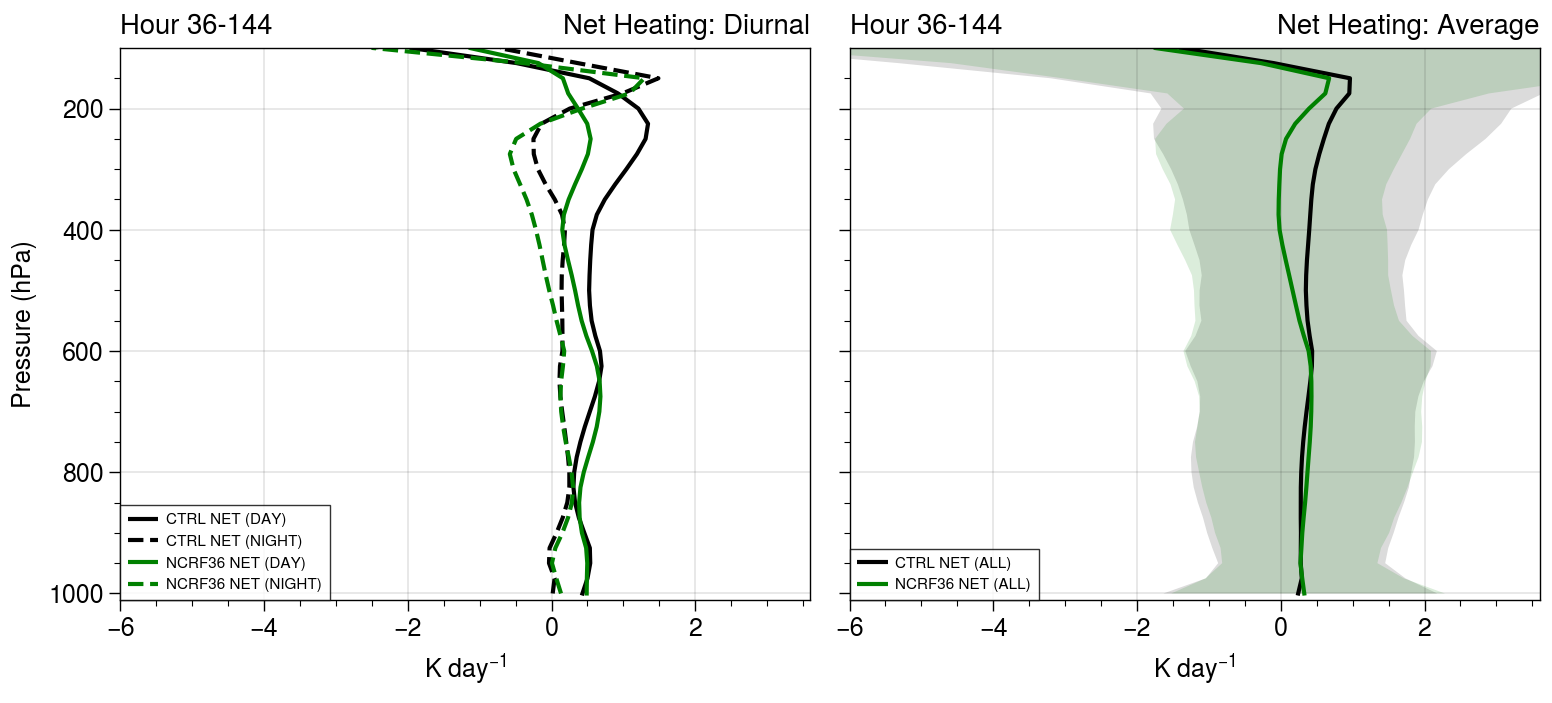

In [15]:
fig,axs = plot.subplots(ncols=2,nrows=1,axwidth=3.45,refaspect=1.251,span=False)
############################################################################################
# Net Heating + Radiative 
############################################################################################
axs[0].plot(np.nanmean(netheat_s_d,axis=(0,2,3))*3600*24,coor.pres,color='k',lw=1.5,
            label='CTRL NET (DAY)')
axs[0].plot(np.nanmean(netheat_s_n,axis=(0,2,3))*3600*24,coor.pres,color='k',lw=1.5,ls='--',
           label='CTRL NET (NIGHT)')
axs[0].plot(np.nanmean(ncrf36netheat_s_d,axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,
            label='NCRF36 NET (DAY)')
axs[0].plot(np.nanmean(ncrf36netheat_s_n,axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,ls='--',
            label='NCRF36 NET (NIGHT)')
axs[0].format(ylim=[1010,100],xlim=[-0.25*24,0.15*24],ltitle='Hour 36-144',rtitle='Net Heating: Diurnal',xlabel=r'K day$^{-1}$',
              ylabel='Pressure (hPa)')
axs[0].legend(loc='ll',ncols=1,prop=dict(size=5.5))

############################################################################################
# Net Heating + Radiative 
############################################################################################
axs[1].plot(np.nanmean((netheat_s_all),axis=(0,2,3))*3600*24,coor.pres,color='k',lw=1.5,
            label='CTRL NET (ALL)')
axs[1].fill_betweenx(coor.pres,np.nanpercentile(netheat_s_all,15,axis=(0,2,3))*3600*24,
                     np.nanpercentile(netheat_s_all,85,axis=(0,2,3))*3600*24,alpha=0.14,
                     color='k')
axs[1].plot(np.nanmean((ncrf36netheat_s_all),axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,
            label='NCRF36 NET (ALL)')
axs[1].fill_betweenx(coor.pres,np.nanpercentile(ncrf36netheat_s_all,15,axis=(0,2,3))*3600*24,
                     np.nanpercentile(ncrf36netheat_s_all,85,axis=(0,2,3))*3600*24,alpha=0.14,
                     color='g')
#axs[0].plot(np.nanmean(residual_d+hdia_s_d,axis=(0,2,3))*3600,coor.pres,color='b',lw=1.5,label='RESI.+LAT.')
#axs[0].plot(np.nanmean(residual_n+hdia_s_n,axis=(0,2,3))*3600,coor.pres,color='b',lw=1.5,ls='--')
axs[1].format(ylim=[1010,100],xlim=[-0.25*24,0.15*24],ltitle='Hour 36-144',rtitle='Net Heating: Average',xlabel=r'K day$^{-1}$',
              ylabel='Pressure (hPa)')
axs[1].legend(loc='ll',ncols=1,prop=dict(size=5.5))

plt.savefig('./proc_fig/netheat_ctrlncrf36.png',dpi=200)
plt.show()

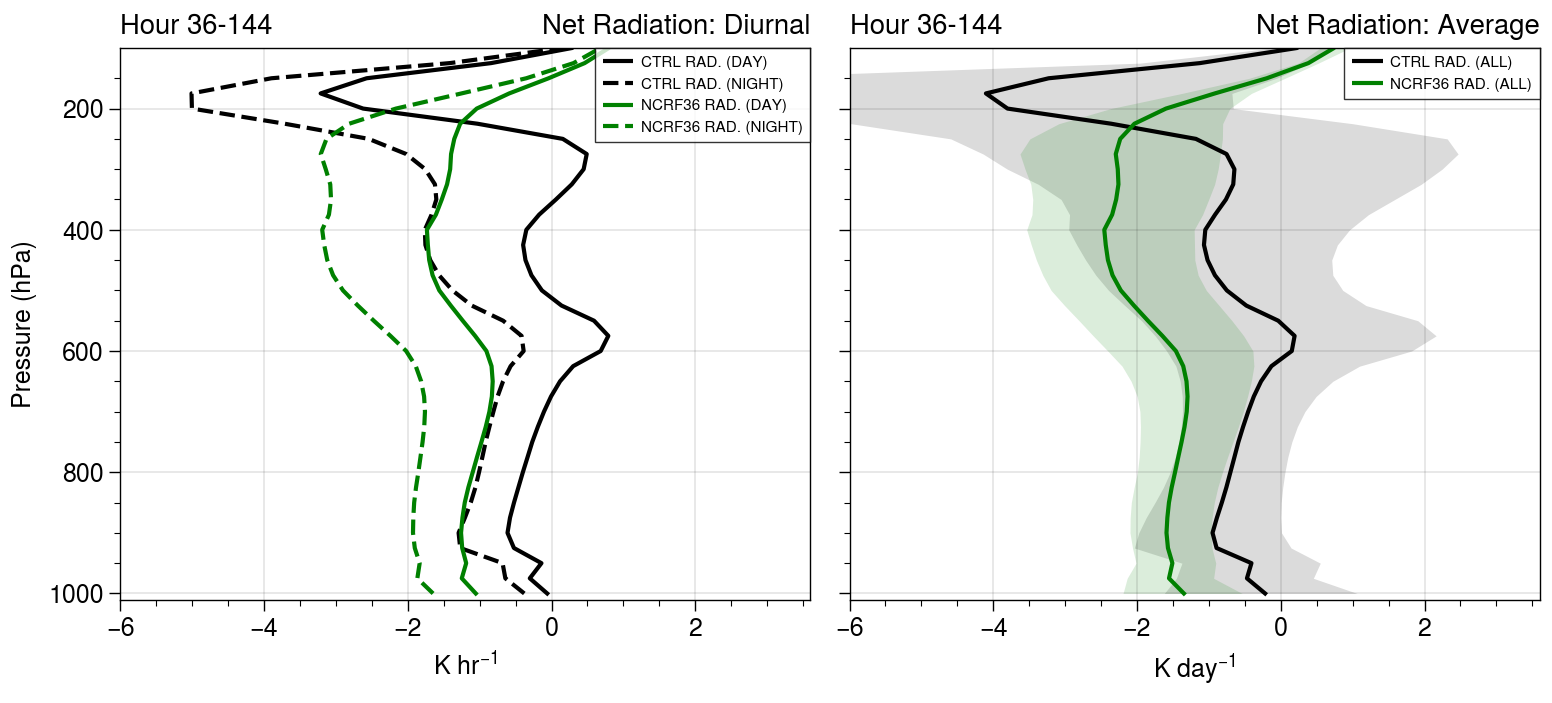

In [24]:
fig,axs = plot.subplots(ncols=2,nrows=1,axwidth=3.45,refaspect=1.251,span=False)
############################################################################################
# Net Heating + Radiative 
############################################################################################
axs[0].plot(np.nanmean(np.asarray(lwheat_s_d[:]+swheat_s_d[:]),axis=(0,2,3))*3600*24,coor.pres,color='k',lw=1.5,
            label='CTRL RAD. (DAY)')
axs[0].plot(np.nanmean(np.asarray(lwheat_s_n[:]+swheat_s_n[:]),axis=(0,2,3))*3600*24,coor.pres,color='k',lw=1.5,ls='--',
           label='CTRL RAD. (NIGHT)')
axs[0].plot(np.nanmean(np.asarray(ncrf36lwheat_s_d[:]+ncrf36swheat_s_d[:]),axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,
            label='NCRF36 RAD. (DAY)')
axs[0].plot(np.nanmean(np.asarray(ncrf36lwheat_s_n[:]+ncrf36swheat_s_n[:]),axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,ls='--',
            label='NCRF36 RAD. (NIGHT)')
#axs[0].plot(np.nanmean(residual_d+hdia_s_d,axis=(0,2,3))*3600,coor.pres,color='b',lw=1.5,label='RESI.+LAT.')
#axs[0].plot(np.nanmean(residual_n+hdia_s_n,axis=(0,2,3))*3600,coor.pres,color='b',lw=1.5,ls='--')
axs[0].format(ylim=[1010,100],xlim=[-0.25*24,0.15*24],ltitle='Hour 36-144',rtitle='Net Radiation: Diurnal',xlabel=r'K hr$^{-1}$',
              ylabel='Pressure (hPa)')
axs[0].legend(loc='ur',ncols=1,prop=dict(size=5.5))

############################################################################################
# Net Heating + Radiative 
############################################################################################
axs[1].plot(np.nanmean((lwheat_s_all+swheat_s_all),axis=(0,2,3))*3600*24,coor.pres,color='k',lw=1.5,
            label='CTRL RAD. (ALL)')
axs[1].fill_betweenx(coor.pres,np.nanpercentile(lwheat_s_all+swheat_s_all,15,axis=(0,2,3))*3600*24,
                     np.nanpercentile(lwheat_s_all+swheat_s_all,85,axis=(0,2,3))*3600*24,alpha=0.14,
                     color='k')
axs[1].plot(np.nanmean((ncrf36lwheat_s_all+ncrf36swheat_s_all),axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,
            label='NCRF36 RAD. (ALL)')
axs[1].fill_betweenx(coor.pres,np.nanpercentile(ncrf36lwheat_s_all+ncrf36swheat_s_all,15,axis=(0,2,3))*3600*24,
                     np.nanpercentile(ncrf36lwheat_s_all+ncrf36swheat_s_all,85,axis=(0,2,3))*3600*24,alpha=0.14,
                     color='g')
#axs[0].plot(np.nanmean(residual_d+hdia_s_d,axis=(0,2,3))*3600,coor.pres,color='b',lw=1.5,label='RESI.+LAT.')
#axs[0].plot(np.nanmean(residual_n+hdia_s_n,axis=(0,2,3))*3600,coor.pres,color='b',lw=1.5,ls='--')
axs[1].format(ylim=[1010,100],xlim=[-0.25*24,0.15*24],ltitle='Hour 36-144',rtitle='Net Radiation: Average',xlabel=r'K day$^{-1}$',
              ylabel='Pressure (hPa)')
axs[1].legend(loc='ur',ncols=1,prop=dict(size=5.5))

plt.savefig('./proc_fig/allradheat_ctrlncrf36.png',dpi=200)
plt.show()

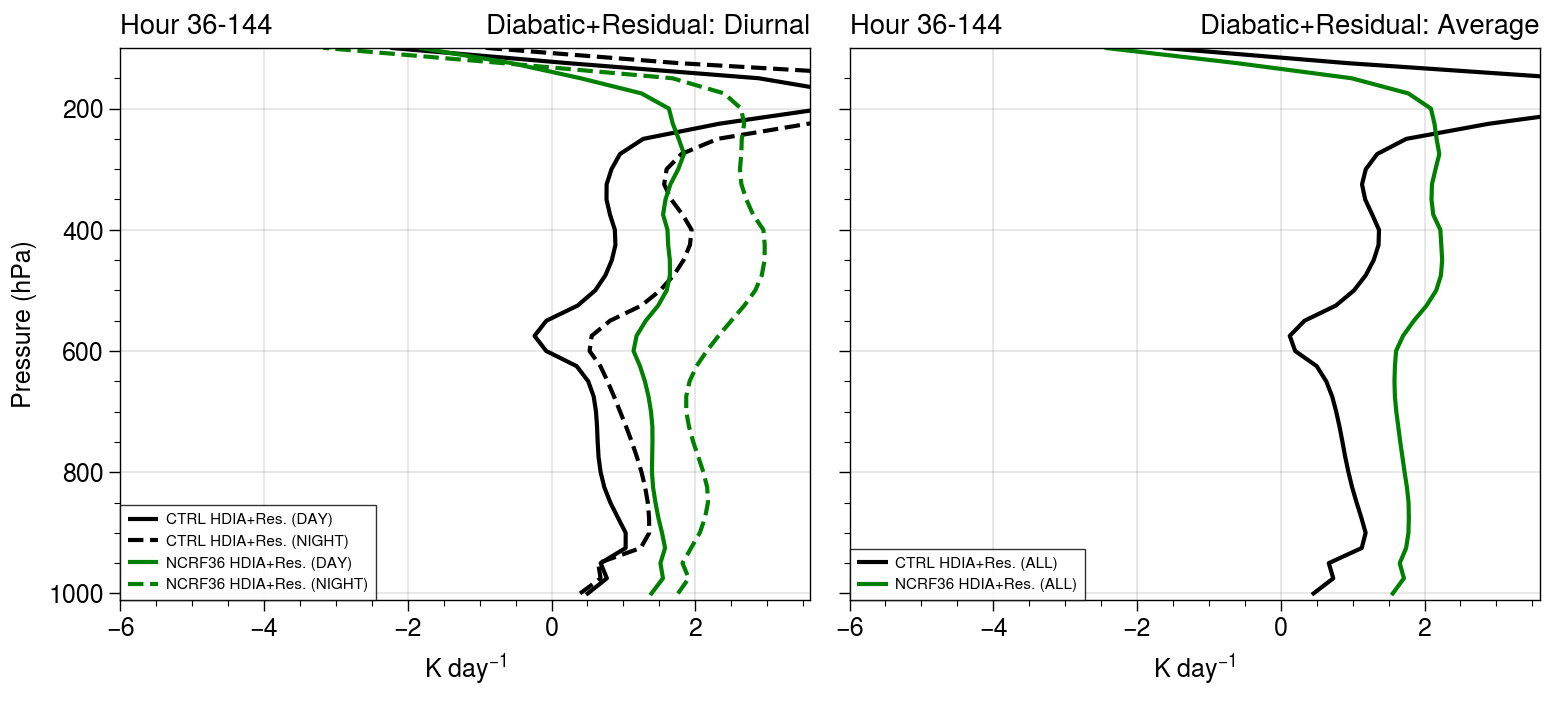

In [14]:
fig,axs = plot.subplots(ncols=2,nrows=1,axwidth=3.45,refaspect=1.251,span=False)
############################################################################################
# Net Heating + Radiative 
############################################################################################
axs[0].plot(np.nanmean(hdia_s_d+residual_d,axis=(0,2,3))*3600*24,coor.pres,color='k',lw=1.5,
            label='CTRL HDIA+Res. (DAY)')
axs[0].plot(np.nanmean(hdia_s_n+residual_n,axis=(0,2,3))*3600*24,coor.pres,color='k',lw=1.5,ls='--',
           label='CTRL HDIA+Res. (NIGHT)')
axs[0].plot(np.nanmean(ncrf36hdia_s_d+ncrf36residual_d,axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,
            label='NCRF36 HDIA+Res. (DAY)')
axs[0].plot(np.nanmean(ncrf36hdia_s_n+ncrf36residual_n,axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,ls='--',
            label='NCRF36 HDIA+Res. (NIGHT)')
axs[0].format(ylim=[1010,100],xlim=[-0.25*24,0.15*24],ltitle='Hour 36-144',rtitle='Diabatic+Residual: Diurnal',xlabel=r'K day$^{-1}$',
              ylabel='Pressure (hPa)')
axs[0].legend(loc='ll',ncols=1,prop=dict(size=5.5))

############################################################################################
# Net Heating + Radiative 
############################################################################################
axs[1].plot(np.nanmean((hdia_s_all+residual_all),axis=(0,2,3))*3600*24,coor.pres,color='k',lw=1.5,
            label='CTRL HDIA+Res. (ALL)')
#axs[1].fill_betweenx(coor.pres,np.nanpercentile(netheat_s_all,15,axis=(0,2,3))*3600*24,
#                     np.nanpercentile(netheat_s_all,85,axis=(0,2,3))*3600*24,alpha=0.14,
#                     color='k')
axs[1].plot(np.nanmean((ncrf36hdia_s_all+ncrf36residual_all),axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,
            label='NCRF36 HDIA+Res. (ALL)')
#axs[1].fill_betweenx(coor.pres,np.nanpercentile(ncrf36netheat_s_all,15,axis=(0,2,3))*3600*24,
#                     np.nanpercentile(ncrf36netheat_s_all,85,axis=(0,2,3))*3600*24,alpha=0.14,
#                     color='g')
#axs[0].plot(np.nanmean(residual_d+hdia_s_d,axis=(0,2,3))*3600,coor.pres,color='b',lw=1.5,label='RESI.+LAT.')
#axs[0].plot(np.nanmean(residual_n+hdia_s_n,axis=(0,2,3))*3600,coor.pres,color='b',lw=1.5,ls='--')
axs[1].format(ylim=[1010,100],xlim=[-0.25*24,0.15*24],ltitle='Hour 36-144',rtitle='Diabatic+Residual: Average',xlabel=r'K day$^{-1}$',
              ylabel='Pressure (hPa)')
axs[1].legend(loc='ll',ncols=1,prop=dict(size=5.5))

plt.savefig('./proc_fig/hdiaresid_ctrlncrf36.png',dpi=200)
plt.show()

In [18]:
del var_dict

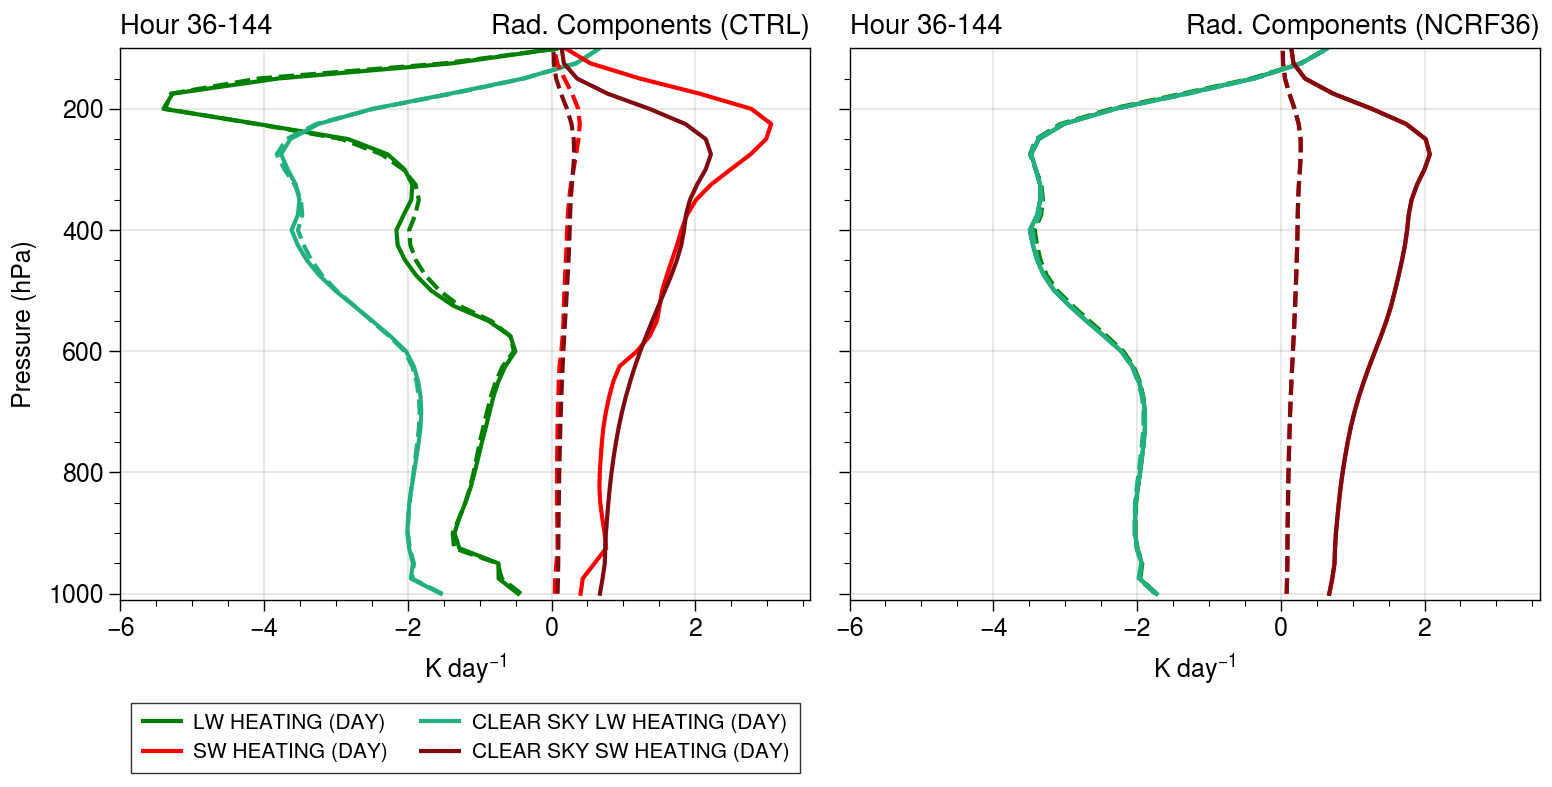

In [23]:
fig,axs = plot.subplots(ncols=2,nrows=1,axwidth=3.45,refaspect=1.251,span=False)
############################################################################################
# Net Heating + Radiative 
############################################################################################
axs[0].plot(np.nanmean(np.asarray(lwheat_s_d[:]),axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,
            label='LW HEATING (DAY)')
axs[0].plot(np.nanmean(np.asarray(lwheat_s_n[:]),axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,ls='--')
axs[0].plot(np.nanmean(np.asarray(lwcheat_s_d[:]),axis=(0,2,3))*3600*24,coor.pres,color='#23b081',lw=1.5,
            label='CLEAR SKY LW HEATING (DAY)')
axs[0].plot(np.nanmean(np.asarray(lwcheat_s_n[:]),axis=(0,2,3))*3600*24,coor.pres,color='#23b081',lw=1.5,ls='--')
axs[0].plot(np.nanmean(np.asarray(swheat_s_d[:]),axis=(0,2,3))*3600*24,coor.pres,color='r',lw=1.5,
            label='SW HEATING (DAY)')
axs[0].plot(np.nanmean(np.asarray(swheat_s_n[:]),axis=(0,2,3))*3600*24,coor.pres,color='r',lw=1.5,ls='--')
axs[0].plot(np.nanmean(np.asarray(swcheat_s_d[:]),axis=(0,2,3))*3600*24,coor.pres,color='#800a10',lw=1.5,
            label='CLEAR SKY SW HEATING (DAY)')
axs[0].plot(np.nanmean(np.asarray(swcheat_s_n[:]),axis=(0,2,3))*3600*24,coor.pres,color='#800a10',lw=1.5,ls='--')
axs[0].format(ylim=[1010,100],xlim=[-0.25*24,0.15*24],ltitle='Hour 36-144',rtitle='Rad. Components (CTRL)',xlabel=r'K day$^{-1}$',
              ylabel='Pressure (hPa)')
axs[0].legend(loc='b',ncols=2,prop=dict(size=7.5))

axs[1].plot(np.nanmean(np.asarray(ncrf36lwheat_s_d[:]),axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,
            label='LW HEATING (DAY)')
axs[1].plot(np.nanmean(np.asarray(ncrf36lwheat_s_n[:]),axis=(0,2,3))*3600*24,coor.pres,color='g',lw=1.5,ls='--')
axs[1].plot(np.nanmean(np.asarray(ncrf36lwcheat_s_d[:]),axis=(0,2,3))*3600*24,coor.pres,color='#23b081',lw=1.5,
            label='CLEAR SKY LW HEATING (DAY)')
axs[1].plot(np.nanmean(np.asarray(ncrf36lwcheat_s_n[:]),axis=(0,2,3))*3600*24,coor.pres,color='#23b081',lw=1.5,ls='--')
axs[1].plot(np.nanmean(np.asarray(ncrf36swheat_s_d[:]),axis=(0,2,3))*3600*24,coor.pres,color='r',lw=1.5,
            label='SW HEATING (DAY)')
axs[1].plot(np.nanmean(np.asarray(ncrf36swheat_s_n[:]),axis=(0,2,3))*3600*24,coor.pres,color='r',lw=1.5,ls='--')
axs[1].plot(np.nanmean(np.asarray(ncrf36swcheat_s_d[:]),axis=(0,2,3))*3600*24,coor.pres,color='#800a10',lw=1.5,
            label='CLEAR SKY SW HEATING (DAY)')
axs[1].plot(np.nanmean(np.asarray(ncrf36swcheat_s_n[:]),axis=(0,2,3))*3600*24,coor.pres,color='#800a10',lw=1.5,ls='--')
axs[1].format(ylim=[1010,100],xlim=[-0.25*24,0.15*24],ltitle='Hour 36-144',rtitle='Rad. Components (NCRF36)',xlabel=r'K day$^{-1}$',
              ylabel='Pressure (hPa)')
#axs[1].legend(loc='b',ncols=2,prop=dict(size=7.5))
plt.savefig('./proc_fig/radcomp_ctrlncrf36_all.png',dpi=200)
plt.show()

#### CTRL only

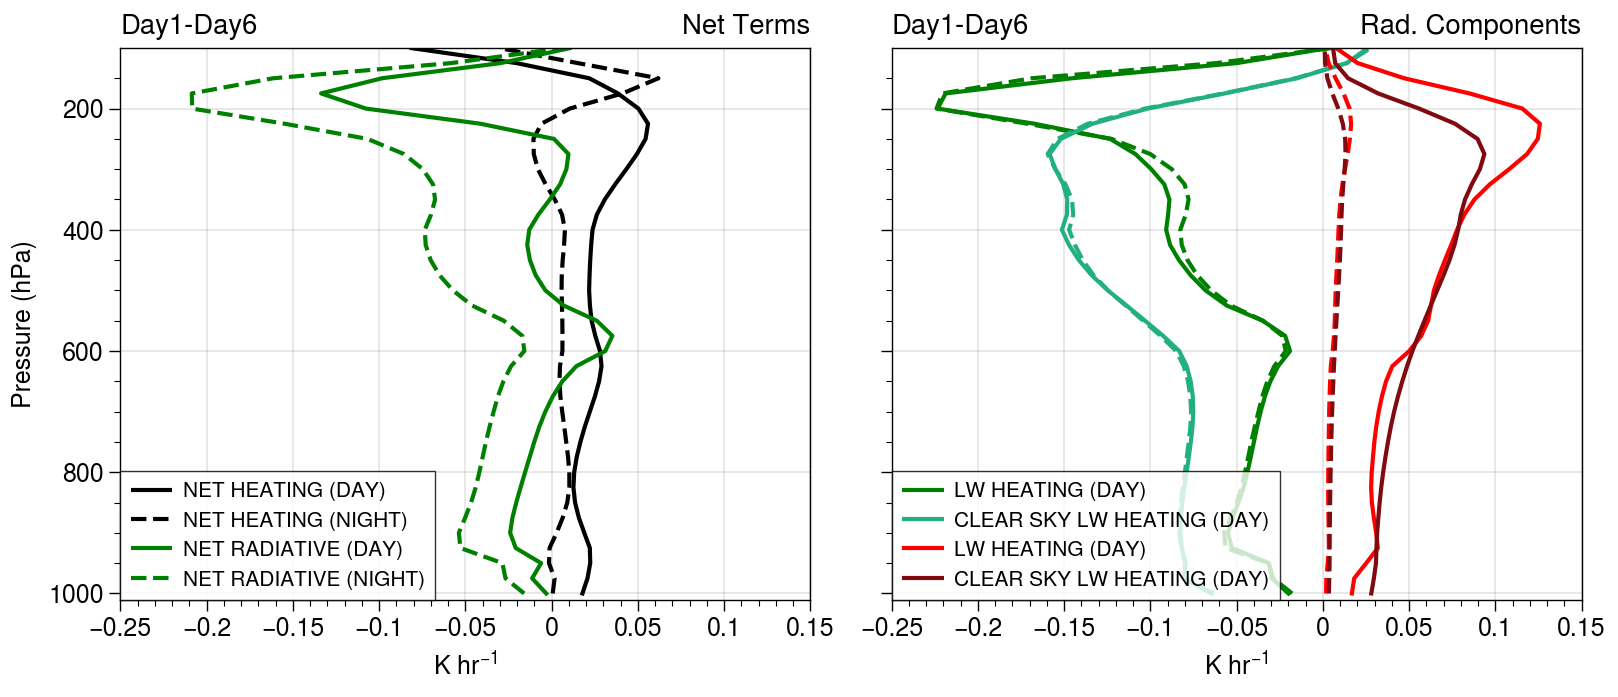

In [24]:
#del a,daycheck,nightcheck
fig,axs = plot.subplots(ncols=2,nrows=1,axwidth=3.45,refaspect=1.251,span=False)
############################################################################################
# Net Heating + Radiative 
############################################################################################
axs[0].plot(np.nanmean(np.asarray(netheat_s_d[:]),axis=(0,2,3))*3600,coor.pres,color='k',lw=1.5,
            label='NET HEATING (DAY)')
axs[0].plot(np.nanmean(np.asarray(netheat_s_n[:]),axis=(0,2,3))*3600,coor.pres,color='k',lw=1.5,ls='--',
           label='NET HEATING (NIGHT)')
axs[0].plot(np.nanmean(np.asarray(allradheat_s_d[:]),axis=(0,2,3))*3600,coor.pres,color='g',lw=1.5,
            label='NET RADIATIVE (DAY)')
axs[0].plot(np.nanmean(np.asarray(allradheat_s_n[:]),axis=(0,2,3))*3600,coor.pres,color='g',lw=1.5,ls='--',
            label='NET RADIATIVE (NIGHT)')
#axs[0].plot(np.nanmean(residual_d+hdia_s_d,axis=(0,2,3))*3600,coor.pres,color='b',lw=1.5,label='RESI.+LAT.')
#axs[0].plot(np.nanmean(residual_n+hdia_s_n,axis=(0,2,3))*3600,coor.pres,color='b',lw=1.5,ls='--')
axs[0].format(ylim=[1010,100],xlim=[-0.25,0.15],ltitle='Day1-Day6',rtitle='Net Terms',xlabel=r'K hr$^{-1}$',
              ylabel='Pressure (hPa)')
axs[0].legend(loc='ll',ncols=1,prop=dict(size=7.5))

############################################################################################
# Net Heating + Radiative 
############################################################################################
axs[1].plot(np.nanmean(np.asarray(lwheat_s_d[:]),axis=(0,2,3))*3600,coor.pres,color='g',lw=1.5,
            label='LW HEATING (DAY)')
axs[1].plot(np.nanmean(np.asarray(lwheat_s_n[:]),axis=(0,2,3))*3600,coor.pres,color='g',lw=1.5,ls='--')
axs[1].plot(np.nanmean(np.asarray(lwcheat_s_d[:]),axis=(0,2,3))*3600,coor.pres,color='#23b081',lw=1.5,
            label='CLEAR SKY LW HEATING (DAY)')
axs[1].plot(np.nanmean(np.asarray(lwcheat_s_n[:]),axis=(0,2,3))*3600,coor.pres,color='#23b081',lw=1.5,ls='--')
axs[1].plot(np.nanmean(np.asarray(swheat_s_d[:]),axis=(0,2,3))*3600,coor.pres,color='r',lw=1.5,
            label='LW HEATING (DAY)')
axs[1].plot(np.nanmean(np.asarray(swheat_s_n[:]),axis=(0,2,3))*3600,coor.pres,color='r',lw=1.5,ls='--')
axs[1].plot(np.nanmean(np.asarray(swcheat_s_d[:]),axis=(0,2,3))*3600,coor.pres,color='#800a10',lw=1.5,
            label='CLEAR SKY LW HEATING (DAY)')
axs[1].plot(np.nanmean(np.asarray(swcheat_s_n[:]),axis=(0,2,3))*3600,coor.pres,color='#800a10',lw=1.5,ls='--')
axs[1].format(ylim=[1010,100],xlim=[-0.25,0.15],ltitle='Day1-Day6',rtitle='Rad. Components',xlabel=r'K hr$^{-1}$',
              ylabel='Pressure (hPa)')
axs[1].legend(loc='ll',ncols=1,prop=dict(size=7.5))
plt.show()

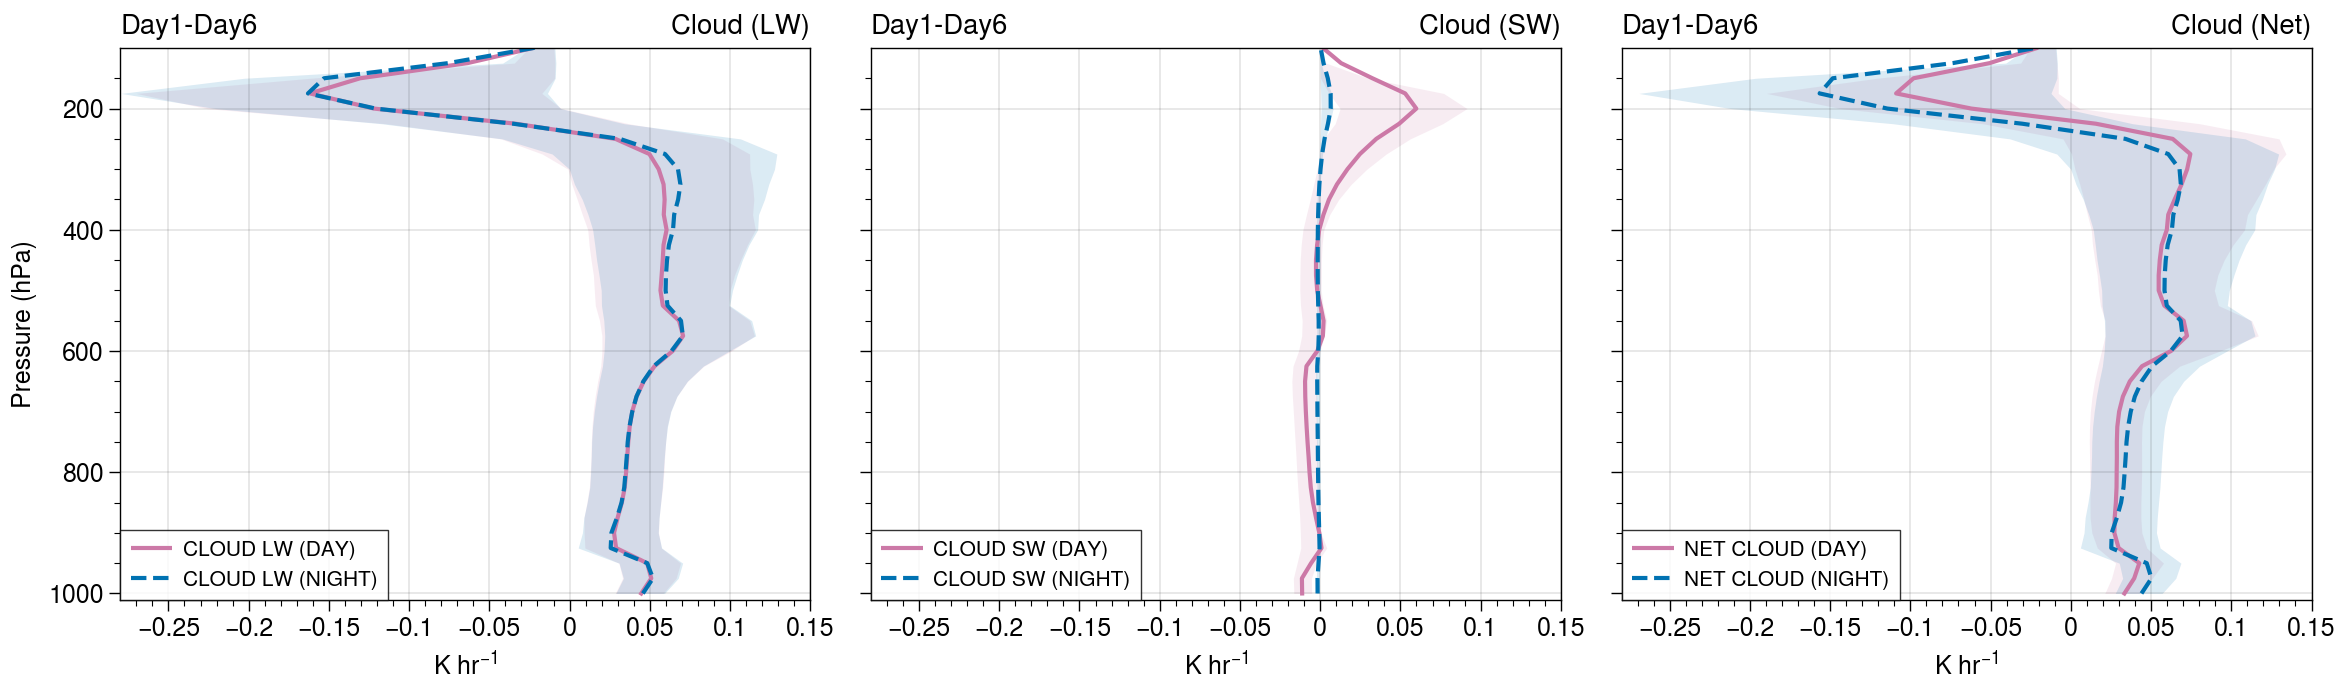

In [31]:
fig,axs = plot.subplots(ncols=3,nrows=1,axwidth=3.45,refaspect=1.251,span=False)
############################################################################################
# Cloud (LW)
############################################################################################
axs[0].plot(np.nanmean(lwheat_s_d-lwcheat_s_d,axis=(0,2,3))*3600,coor.pres,color='C3',lw=1.5,
            label='CLOUD LW (DAY)')
axs[0].fill_betweenx(coor.pres,np.nanpercentile(lwheat_s_d-lwcheat_s_d,25,axis=(0,2,3))*3600,
                     np.nanpercentile(lwheat_s_d-lwcheat_s_d,75,axis=(0,2,3))*3600,alpha=0.14,
                     color='C3')
axs[0].plot(np.nanmean(lwheat_s_n-lwcheat_s_n,axis=(0,2,3))*3600,coor.pres,color='C0',lw=1.5,ls='--',
            label='CLOUD LW (NIGHT)')
axs[0].fill_betweenx(coor.pres,np.nanpercentile(lwheat_s_n-lwcheat_s_n,25,axis=(0,2,3))*3600,
                     np.nanpercentile(lwheat_s_n-lwcheat_s_n,75,axis=(0,2,3))*3600,alpha=0.14,
                     color='C0')
axs[0].format(ylim=[1010,100],xlim=[-0.28,0.15],ltitle='Day1-Day6',rtitle='Cloud (LW)',xlabel=r'K hr$^{-1}$',
              ylabel='Pressure (hPa)')
axs[0].legend(loc='ll',ncols=1,prop=dict(size=7.5))

############################################################################################
# Cloud (SW)
############################################################################################
axs[1].plot(np.nanmean(swheat_s_d-swcheat_s_d,axis=(0,2,3))*3600,coor.pres,color='C3',lw=1.5,
            label='CLOUD SW (DAY)')
axs[1].fill_betweenx(coor.pres,np.nanpercentile(swheat_s_d-swcheat_s_d,25,axis=(0,2,3))*3600,
                     np.nanpercentile(swheat_s_d-swcheat_s_d,75,axis=(0,2,3))*3600,alpha=0.14,
                     color='C3')
axs[1].plot(np.nanmean(swheat_s_n-swcheat_s_n,axis=(0,2,3))*3600,coor.pres,color='C0',lw=1.5,ls='--',
            label='CLOUD SW (NIGHT)')
axs[1].fill_betweenx(coor.pres,np.nanpercentile(swheat_s_n-swcheat_s_n,25,axis=(0,2,3))*3600,
                     np.nanpercentile(swheat_s_n-swcheat_s_n,75,axis=(0,2,3))*3600,alpha=0.14,
                     color='C0')
axs[1].format(ylim=[1010,100],xlim=[-0.28,0.15],ltitle='Day1-Day6',rtitle='Cloud (SW)',xlabel=r'K hr$^{-1}$',
              ylabel='Pressure (hPa)')
axs[1].legend(loc='ll',ncols=1,prop=dict(size=7.5))

axs[2].plot(np.nanmean(lwheat_s_d-lwcheat_s_d+swheat_s_d-swcheat_s_d,axis=(0,2,3))*3600,coor.pres,color='C3',lw=1.5,
            label='NET CLOUD (DAY)')
axs[2].fill_betweenx(coor.pres,np.nanpercentile(lwheat_s_d-lwcheat_s_d+swheat_s_d-swcheat_s_d,25,axis=(0,2,3))*3600,
                     np.nanpercentile(lwheat_s_d-lwcheat_s_d+swheat_s_d-swcheat_s_d,75,axis=(0,2,3))*3600,alpha=0.14,
                     color='C3')
#Net
axs[2].plot(np.nanmean(lwheat_s_n-lwcheat_s_n+swheat_s_n-swcheat_s_n,axis=(0,2,3))*3600,coor.pres,color='C0',lw=1.5,ls='--',
            label='NET CLOUD (NIGHT)')
axs[2].fill_betweenx(coor.pres,np.nanpercentile(lwheat_s_n-lwcheat_s_n+swheat_s_n-swcheat_s_n,25,axis=(0,2,3))*3600,
                     np.nanpercentile(lwheat_s_n-lwcheat_s_n+swheat_s_n-swcheat_s_n,75,axis=(0,2,3))*3600,alpha=0.14,
                     color='C0')
axs[2].format(ylim=[1010,100],xlim=[-0.28,0.15],ltitle='Day1-Day6',rtitle='Cloud (Net)',xlabel=r'K hr$^{-1}$',
              ylabel='Pressure (hPa)')
axs[2].legend(loc='ll',ncols=1,prop=dict(size=7.5))
plt.show()

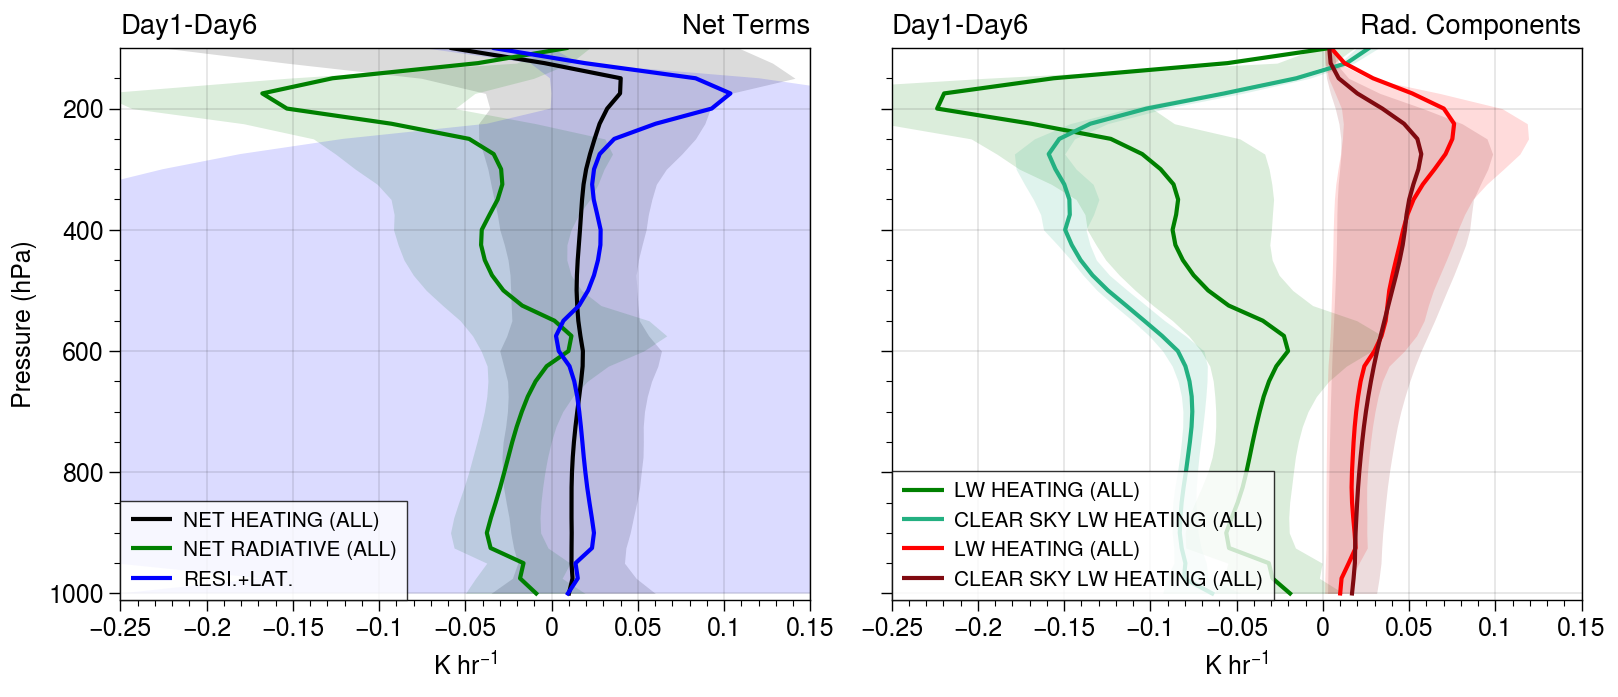

In [22]:
fig,axs = plot.subplots(ncols=2,nrows=1,axwidth=3.45,refaspect=1.251,span=False)
############################################################################################
# Net Heating + Radiative 
############################################################################################
axs[0].plot(np.nanmean(np.asarray(netheat_s_all[:]),axis=(0,2,3))*3600,coor.pres,color='k',lw=1.5,
            label='NET HEATING (ALL)')
axs[0].fill_betweenx(coor.pres,np.nanpercentile(np.asarray(netheat_s_all[:]),25,axis=(0,2,3))*3600,
                     np.nanpercentile(np.asarray(netheat_s_all[:]),75,axis=(0,2,3))*3600,alpha=0.14,
                     color='k')
axs[0].plot(np.nanmean(np.asarray(allradheat_s_all[:]),axis=(0,2,3))*3600,coor.pres,color='g',lw=1.5,
            label='NET RADIATIVE (ALL)')
axs[0].fill_betweenx(coor.pres,np.nanpercentile(np.asarray(allradheat_s_all[:]),25,axis=(0,2,3))*3600,
                     np.nanpercentile(np.asarray(allradheat_s_all[:]),75,axis=(0,2,3))*3600,alpha=0.14,
                     color='g')
axs[0].plot(np.nanmean(residual_all+hdia_s_all,axis=(0,2,3))*3600,coor.pres,color='b',lw=1.5,label='RESI.+LAT.')
axs[0].fill_betweenx(coor.pres,np.nanpercentile(residual_all+hdia_s_all,25,axis=(0,2,3))*3600,
                     np.nanpercentile(residual_all+hdia_s_all,75,axis=(0,2,3))*3600,alpha=0.14,
                     color='b')
#axs[0].plot(np.nanmean(residual_n+hdia_s_n,axis=(0,2,3))*3600,coor.pres,color='b',lw=1.5,ls='--')
axs[0].format(ylim=[1010,100],xlim=[-0.25,0.15],ltitle='Day1-Day6',rtitle='Net Terms',xlabel=r'K hr$^{-1}$',
              ylabel='Pressure (hPa)')
axs[0].legend(loc='ll',ncols=1,prop=dict(size=7.5))

############################################################################################
# Net Heating + Radiative 
############################################################################################
axs[1].plot(np.nanmean(np.asarray(lwheat_s_all[:]),axis=(0,2,3))*3600,coor.pres,color='g',lw=1.5,
            label='LW HEATING (ALL)')
axs[1].fill_betweenx(coor.pres,np.nanpercentile(np.asarray(lwheat_s_all[:]),25,axis=(0,2,3))*3600,
                     np.nanpercentile(np.asarray(lwheat_s_all[:]),75,axis=(0,2,3))*3600,alpha=0.14,
                     color='g')
axs[1].plot(np.nanmean(np.asarray(lwcheat_s_all[:]),axis=(0,2,3))*3600,coor.pres,color='#23b081',lw=1.5,
            label='CLEAR SKY LW HEATING (ALL)')
axs[1].fill_betweenx(coor.pres,np.nanpercentile(np.asarray(lwcheat_s_all[:]),25,axis=(0,2,3))*3600,
                     np.nanpercentile(np.asarray(lwcheat_s_all[:]),75,axis=(0,2,3))*3600,alpha=0.14,
                     color='#23b081')
axs[1].plot(np.nanmean(np.asarray(swheat_s_all[:]),axis=(0,2,3))*3600,coor.pres,color='r',lw=1.5,
            label='LW HEATING (ALL)')
axs[1].fill_betweenx(coor.pres,np.nanpercentile(np.asarray(swheat_s_all[:]),25,axis=(0,2,3))*3600,
                     np.nanpercentile(np.asarray(swheat_s_all[:]),75,axis=(0,2,3))*3600,alpha=0.14,
                     color='r')
axs[1].plot(np.nanmean(np.asarray(swcheat_s_all[:]),axis=(0,2,3))*3600,coor.pres,color='#800a10',lw=1.5,
            label='CLEAR SKY LW HEATING (ALL)')
axs[1].fill_betweenx(coor.pres,np.nanpercentile(np.asarray(swcheat_s_all[:]),25,axis=(0,2,3))*3600,
                     np.nanpercentile(np.asarray(swcheat_s_all[:]),75,axis=(0,2,3))*3600,alpha=0.14,
                     color='#800a10')
axs[1].format(ylim=[1010,100],xlim=[-0.25,0.15],ltitle='Day1-Day6',rtitle='Rad. Components',xlabel=r'K hr$^{-1}$',
              ylabel='Pressure (hPa)')
axs[1].legend(loc='ll',ncols=1,prop=dict(size=7.5))
plt.show()

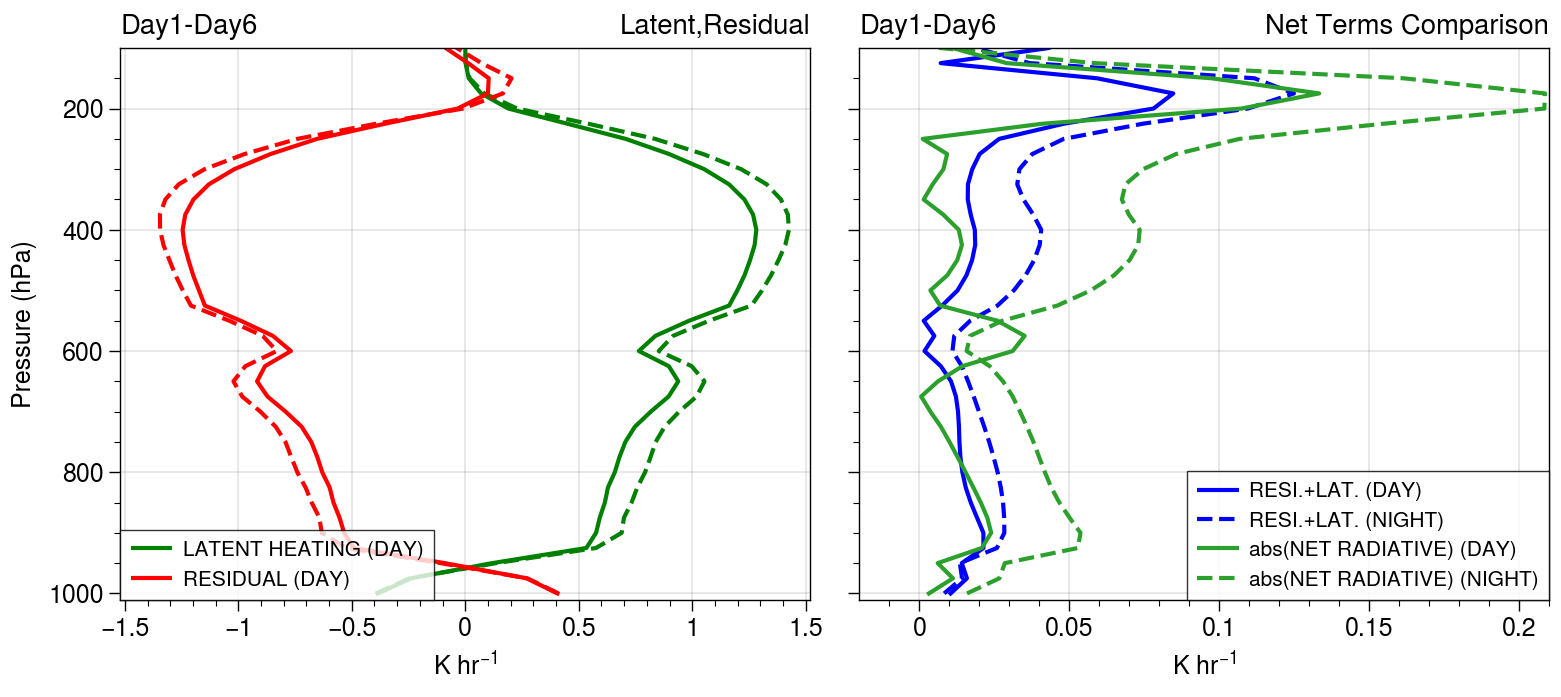

In [59]:
fig,axs = plot.subplots(ncols=2,nrows=1,axwidth=3.45,refaspect=1.251,span=False)
############################################################################################
# Latent Heating, Residual
############################################################################################
axs[0].plot(np.nanmean(np.asarray(hdia_s_d[:]),axis=(0,2,3))*3600,coor.pres,color='g',lw=1.5,
            label='LATENT HEATING (DAY)')
axs[0].plot(np.nanmean(np.asarray(hdia_s_n[:]),axis=(0,2,3))*3600,coor.pres,color='g',lw=1.5,ls='--')
axs[0].plot(np.nanmean(np.asarray(residual_d[:]),axis=(0,2,3))*3600,coor.pres,color='r',lw=1.5,
            label='RESIDUAL (DAY)')
axs[0].plot(np.nanmean(np.asarray(residual_n[:]),axis=(0,2,3))*3600,coor.pres,color='r',lw=1.5,ls='--')
axs[0].format(ylim=[1010,100],xlim=[-1.52,1.52],ltitle='Day1-Day6',rtitle='Latent,Residual',xlabel=r'K hr$^{-1}$',
              ylabel='Pressure (hPa)')
axs[0].legend(loc='ll',ncols=1,prop=dict(size=7.5))

####################################################################################################################
# Absolute Heating Components
####################################################################################################################
axs[1].plot(np.abs(np.nanmean(residual_d+hdia_s_d,axis=(0,2,3)))*3600,coor.pres,
            color='b',lw=1.5,label='RESI.+LAT. (DAY)')
axs[1].plot(np.abs(np.nanmean(residual_n+hdia_s_n,axis=(0,2,3)))*3600,coor.pres,
            color='b',lw=1.5,label='RESI.+LAT. (NIGHT)',ls='--')
axs[1].plot(np.abs(np.nanmean(allradheat_s_d,axis=(0,2,3)))*3600,coor.pres,
            color='#2ca02c',lw=1.5,label='abs(NET RADIATIVE) (DAY)')
axs[1].plot(np.abs(np.nanmean(allradheat_s_n,axis=(0,2,3)))*3600,coor.pres,
            color='#2ca02c',lw=1.5,label='abs(NET RADIATIVE) (NIGHT)',ls='--')
axs[1].format(ylim=[1010,100],ltitle='Day1-Day6',rtitle='Net Terms Comparison',xlabel=r'K hr$^{-1}$',ylabel='Pressure (hPa)',
             xlim=[-0.02,0.21])
axs[1].legend(loc='lr',ncols=1,prop=dict(size=7.5))

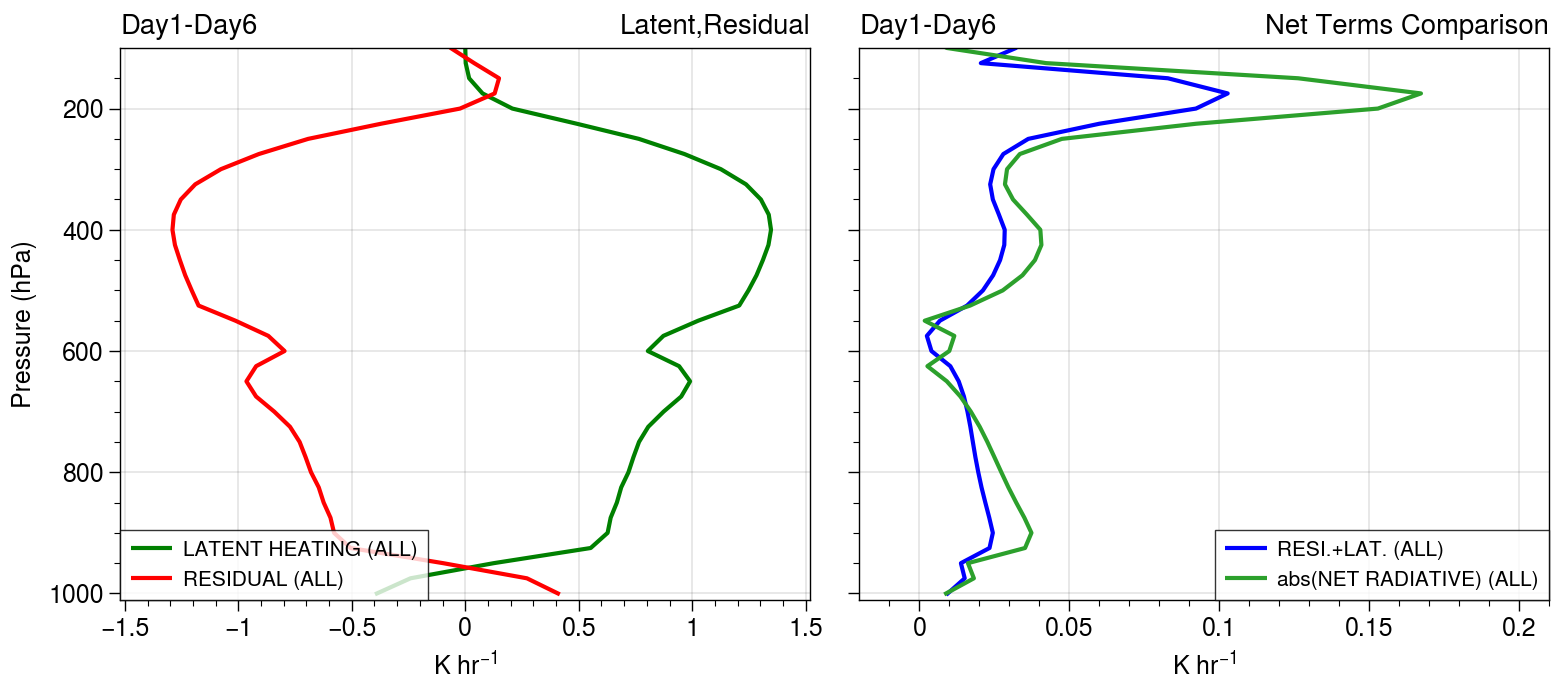

In [60]:
fig,axs = plot.subplots(ncols=2,nrows=1,axwidth=3.45,refaspect=1.251,span=False)
############################################################################################
# Latent Heating, Residual
############################################################################################
axs[0].plot(np.nanmean(np.asarray(hdia_s_all[:]),axis=(0,2,3))*3600,coor.pres,color='g',lw=1.5,
            label='LATENT HEATING (ALL)')
axs[0].plot(np.nanmean(np.asarray(residual_all[:]),axis=(0,2,3))*3600,coor.pres,color='r',lw=1.5,
            label='RESIDUAL (ALL)')
axs[0].format(ylim=[1010,100],xlim=[-1.52,1.52],ltitle='Day1-Day6',rtitle='Latent,Residual',xlabel=r'K hr$^{-1}$',
              ylabel='Pressure (hPa)')
axs[0].legend(loc='ll',ncols=1,prop=dict(size=7.5))

####################################################################################################################
# Absolute Heating Components
####################################################################################################################
axs[1].plot(np.abs(np.nanmean(residual_all+hdia_s_all,axis=(0,2,3)))*3600,coor.pres,
            color='b',lw=1.5,label='RESI.+LAT. (ALL)')
axs[1].plot(np.abs(np.nanmean(allradheat_s_all,axis=(0,2,3)))*3600,coor.pres,
            color='#2ca02c',lw=1.5,label='abs(NET RADIATIVE) (ALL)')
axs[1].format(ylim=[1010,100],ltitle='Day1-Day6',rtitle='Net Terms Comparison',xlabel=r'K hr$^{-1}$',ylabel='Pressure (hPa)',
             xlim=[-0.02,0.21])
axs[1].legend(loc='lr',ncols=1,prop=dict(size=7.5))

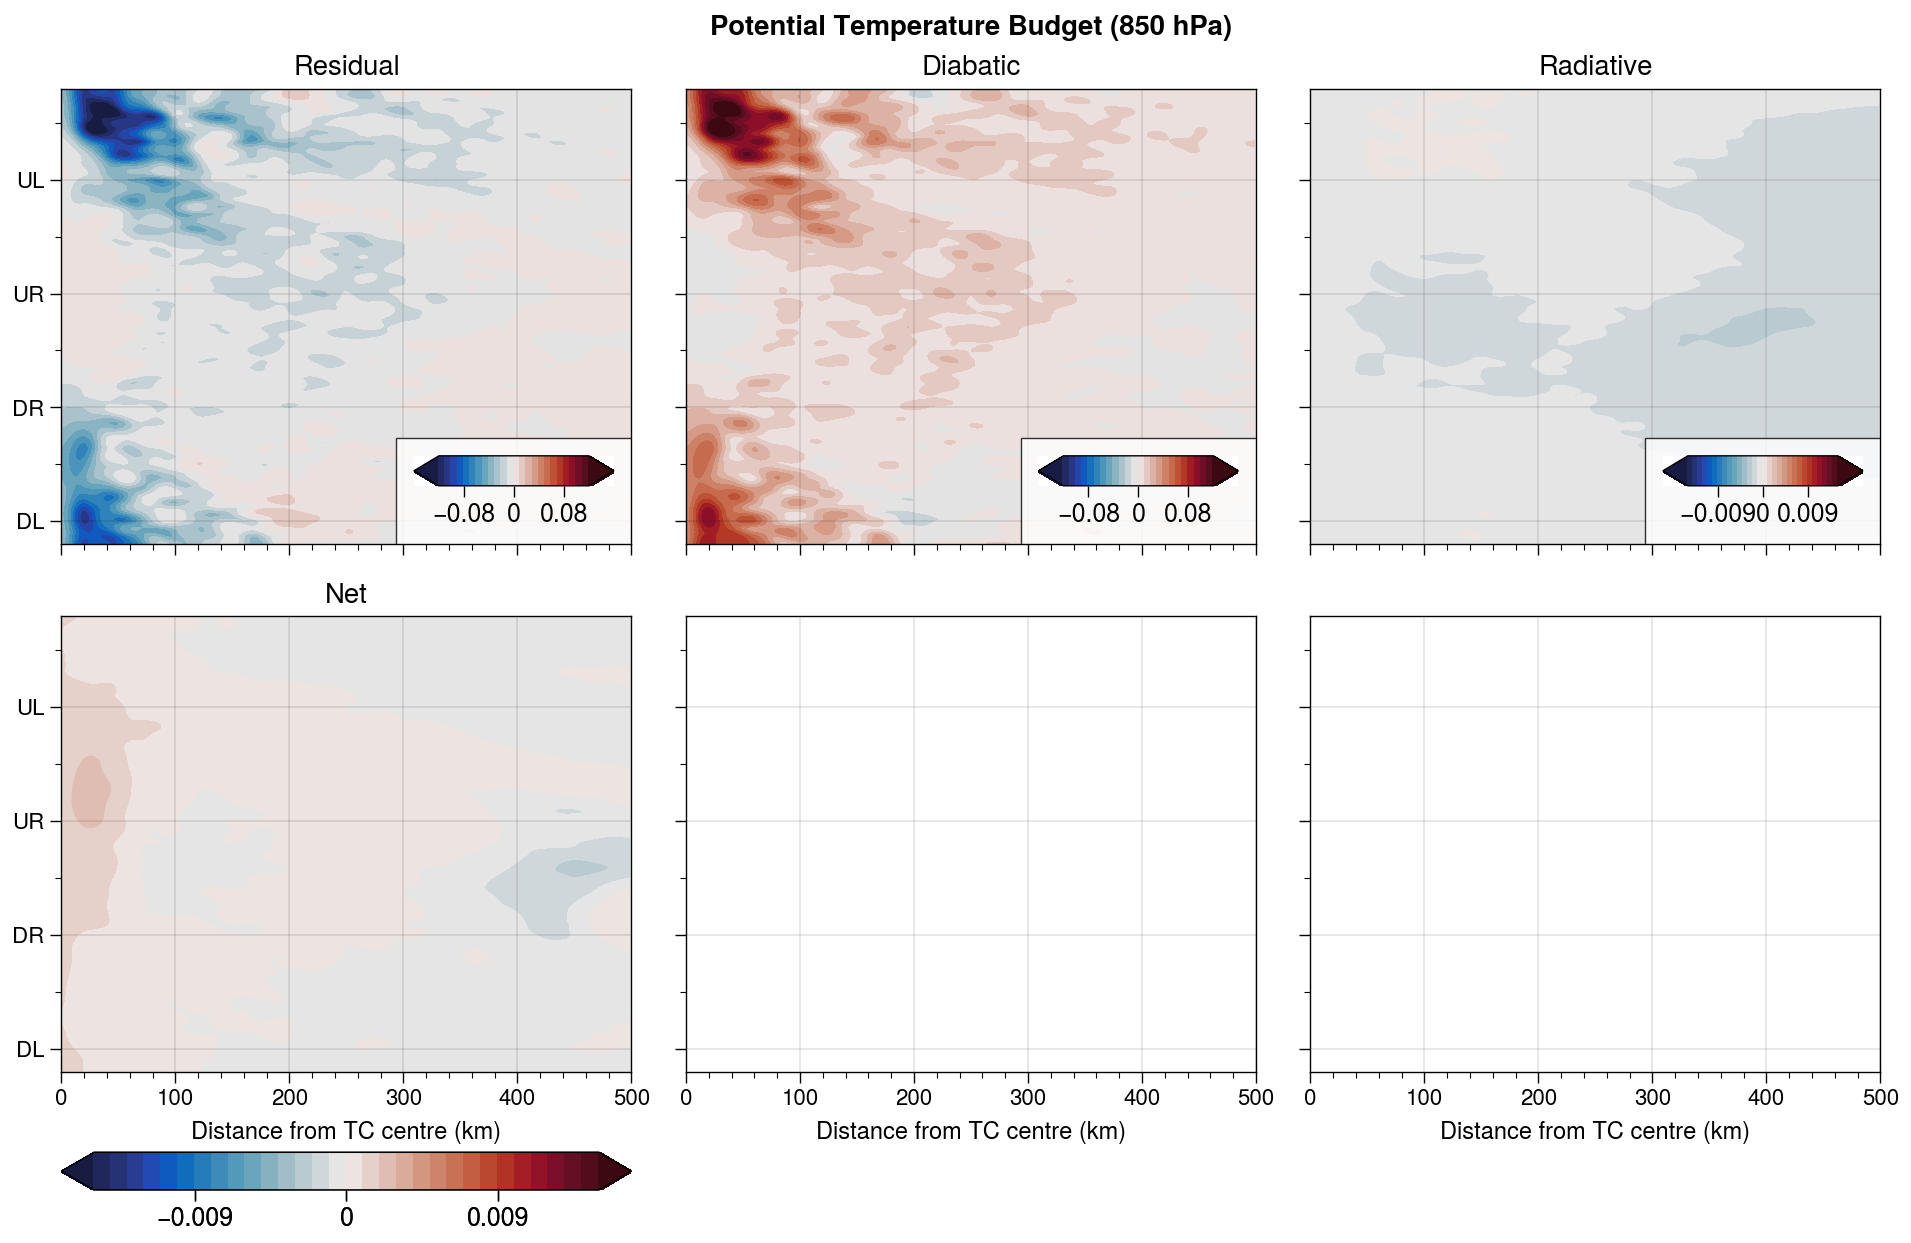

In [19]:
heightindx=6
import matplotlib.ticker as mticker
fig,axs = plot.subplots(ncols=3,nrows=2,axwidth=2.85,refaspect=1.251,span=False)
img=axs[0].contourf(ctrlvar_dict['RTHRATLW'].radius[:r500],ctrlvar_dict['RTHRATLW'].azmiuth,
               np.nanmean(test[ctrl_t2:ctrl_t4,heightindx,:,:r500],axis=0)*60,cmap='balance',\
                     levels=np.linspace(-0.12,0.12,25),extend='both')#hdia_s[50,5,:,:])
axs[0].colorbar(img,loc='lr',ticks=[-0.08,0,0.08])
axs[0].format(xlim=[0,500],ylim=[0,360],xlabel='Distance from TC centre (km)',
              title='Residual'.format(int(coor.pres[heightindx].data)))
img=axs[1].contourf(ctrlvar_dict['RTHRATLW'].radius[:r500],ctrlvar_dict['RTHRATLW'].azmiuth,
               np.nanmean(hdia_s[ctrl_t2:ctrl_t4,heightindx,:,:r500],axis=0)*60,cmap='balance',\
                     levels=np.linspace(-0.12,0.12,25),extend='both')#hdia_s[50,5,:,:])
axs[1].colorbar(img,loc='lr',ticks=[-0.08,0,0.08])
axs[1].format(xlim=[0,500],ylim=[0,360],xlabel='Distance from TC centre (km)',
              title='Diabatic'.format(int(coor.pres[heightindx].data)))
img=axs[2].contourf(ctrlvar_dict['RTHRATLW'].radius[:r500],ctrlvar_dict['RTHRATLW'].azmiuth,
               np.nanmean(allradheat_s[ctrl_t2:ctrl_t4,heightindx,:,:r500],axis=0)*60,cmap='balance',\
                     levels=np.linspace(-0.015,0.015,31),extend='both')#hdia_s[50,5,:,:])
axs[2].colorbar(img,loc='lr',ticks=[-0.009,0,0.009])
axs[2].format(xlim=[0,500],ylim=[0,360],xlabel='Distance from TC centre (km)',
              title='Radiative'.format(int(coor.pres[heightindx].data)))

img=axs[3].contourf(ctrlvar_dict['RTHRATLW'].radius[:r500],ctrlvar_dict['RTHRATLW'].azmiuth,
               np.nanmean(ctrl_thetagrad_b_s[ctrl_t2:ctrl_t4,heightindx,:,:r500],axis=0)*60,cmap='balance',\
                     extend='both',levels=np.linspace(-0.015,0.015,31))#hdia_s[50,5,:,:])
axs[3].colorbar(img,loc='b',ticks=[-0.009,0,0.009])#,ticks=[-0.008,0,0.008])
axs[3].format(xlim=[0,500],ylim=[0,360],xlabel='Distance from TC centre (km)',
              title='Net'.format(int(coor.pres[heightindx].data)))

axs.format(yticks=[18.22,108.22,198.22,288.22],yticklabels=['DL','DR','UR','UL'],
           suptitle=r'Potential Temperature Budget ({} hPa)'.format(int(coor.pres[heightindx].data)),ylabel='')

for axisobj in axs:
    axisobj.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    axisobj.yaxis.label.set_size(8.5)
    axisobj.xaxis.label.set_size(8.5)
    axisobj.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [ ]:
from metpy.calc import pressure_to_height_std
from metpy.units import units
path_coor = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/post/U.nc'
coor = xr.open_dataset(path_coor)
pressure = units.Quantity(coor.pres.data, 'hPa')
height = np.asarray(pressure_to_height_std(pressure))
int_lwc = np.trapz(dataLWC.RTHRATLWC[:,:,:,:],height,axis=1)

Finished!


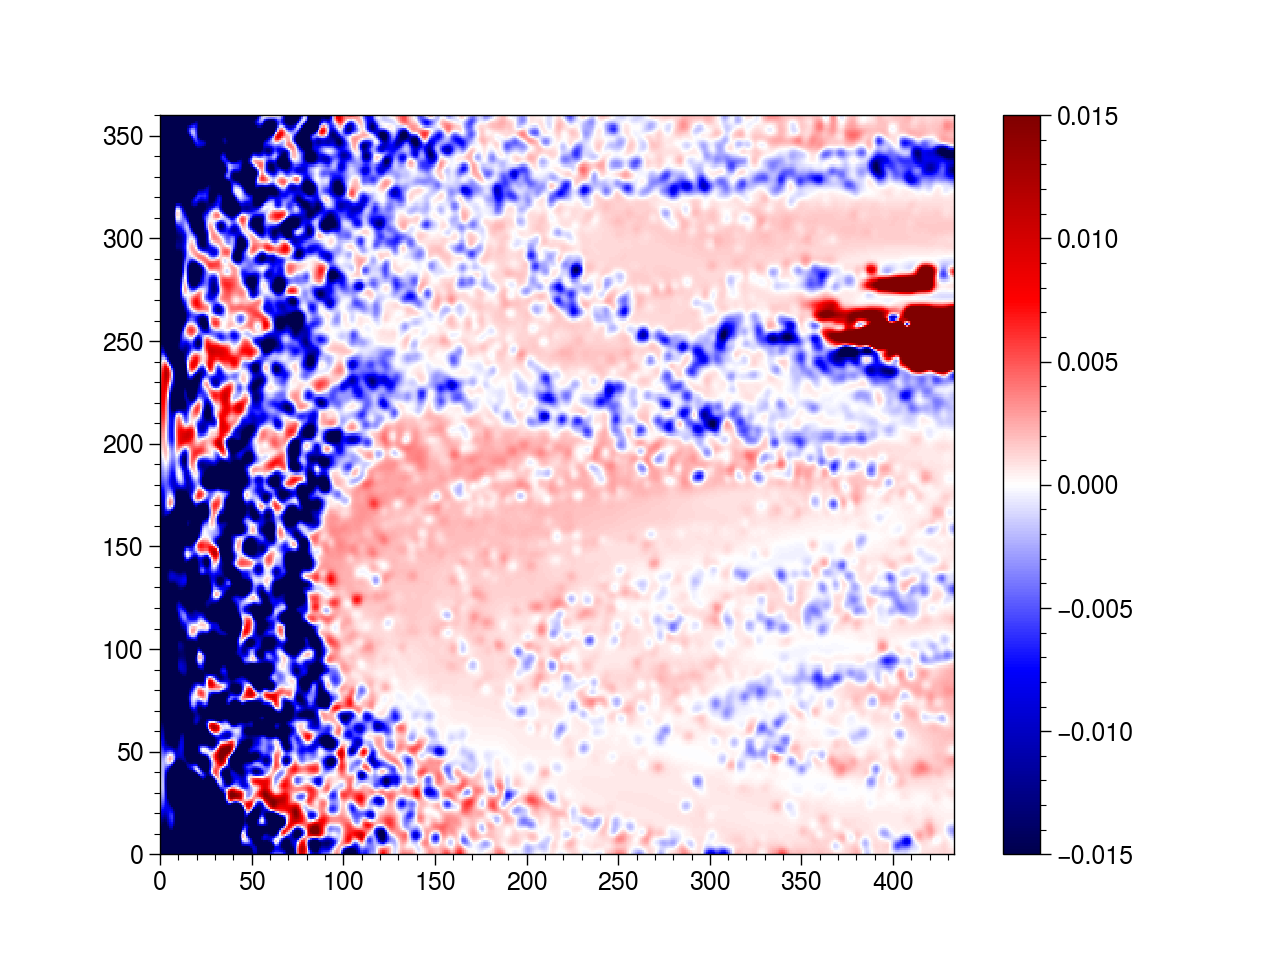

In [27]:
testsmooth = do_gauss_smooth(var=test,gaussian=[6,2,2])

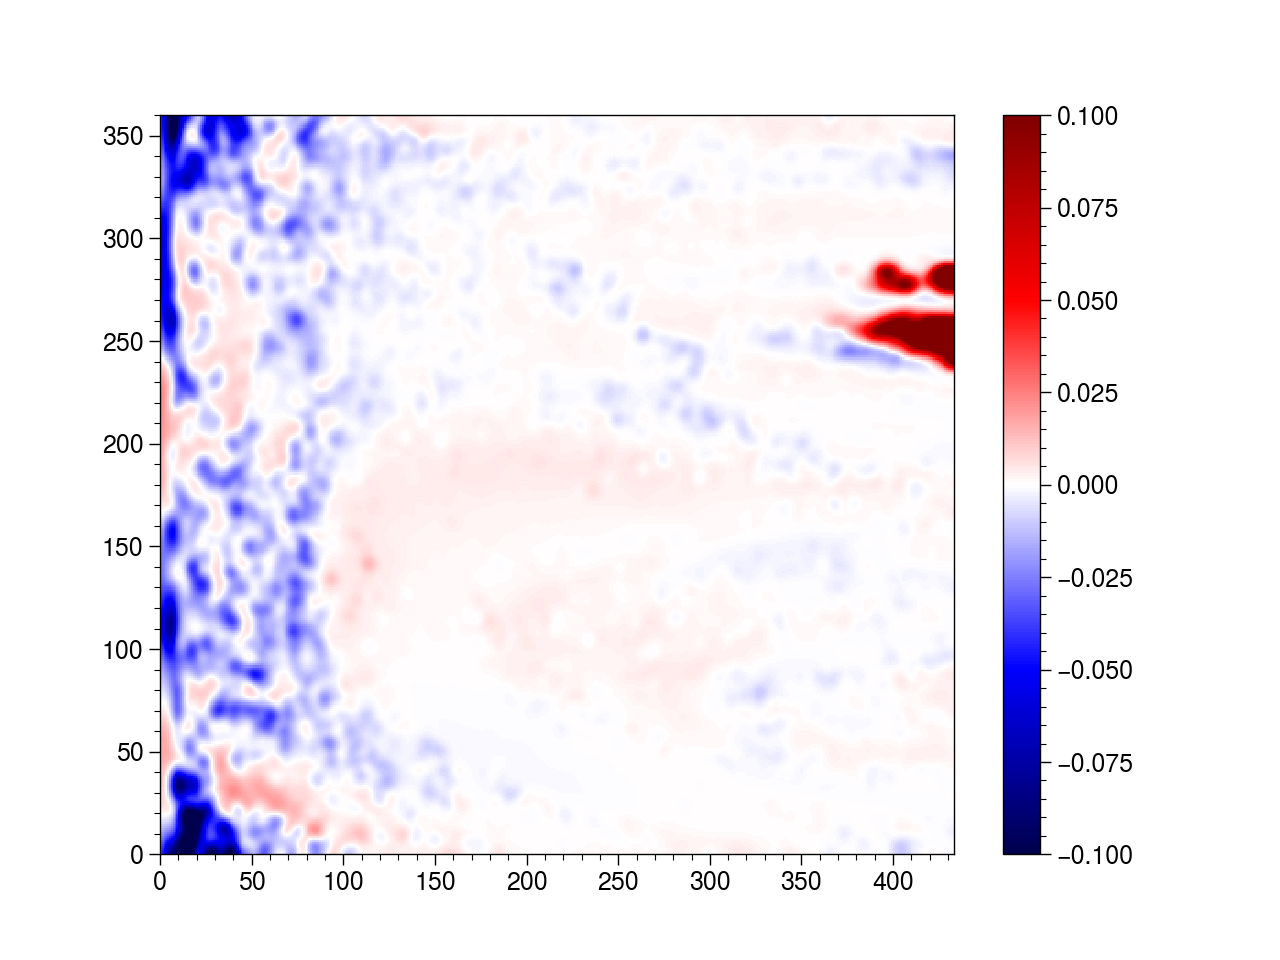

In [46]:
plt.pcolormesh(test[70,8,:,:]*60,
               cmap='seismic',vmin=-0.1,vmax=0.1)#hdia_s[50,5,:,:])
plt.colorbar()
plt.show()